In [1]:
import numpy as np
rng = np.random.RandomState(42)

In [2]:
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

In [3]:
y[::2] += 0.5 * (0.5 - rng.rand(50))

In [4]:
from sklearn import tree

In [5]:
regr1 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [6]:
regr2 = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
regr2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [7]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [8]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

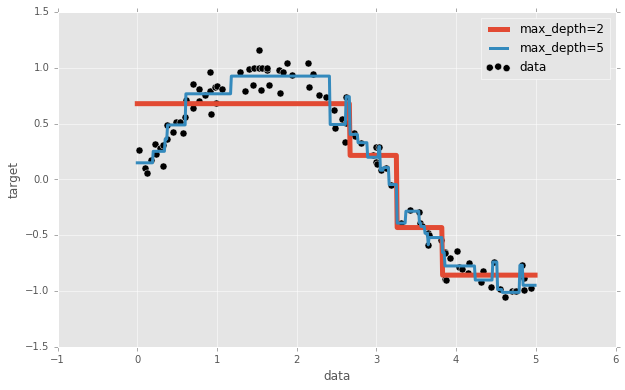

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=50, label='data')
plt.plot(X_test, y_1, label="max_depth=2", linewidth=5)
plt.plot(X_test, y_2, label="max_depth=5", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()